## Cost function for logistic regression is Cost-Entropy Error

In [29]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
N = 100
D = 2

X = np.random.randn(N,D)
X[:5]

array([[ 1.09875722, -2.86363632],
       [-0.87362301,  1.16591218],
       [ 0.19207412,  0.01125803],
       [ 0.06460743,  0.63213189],
       [-1.08248061,  1.62640262]])

In [31]:
# center the first 50 points at (-2,-2)
A = np.ones((50,D))

X[:50,:] = X[:50,:] - 2*A

# center the last 50 points at (2, 2)
X[50:,:] = X[50:,:] + 2*A

X[:5]

array([[-0.90124278, -4.86363632],
       [-2.87362301, -0.83408782],
       [-1.80792588, -1.98874197],
       [-1.93539257, -1.36786811],
       [-3.08248061, -0.37359738]])

In [32]:
X[51:56]

array([[ 2.95176684e+00,  1.38870967e+00],
       [ 2.20153055e+00,  1.40775538e+00],
       [ 3.08847934e+00,  3.05898214e+00],
       [ 3.41359079e+00,  1.89215592e+00],
       [ 3.22922374e+00, -3.36817430e-03]])

In [33]:
# Create targets

# first 50 are 0, last 50 are 1
T = np.array([0]*50 + [1]*50)

# add a column of ones
ones = np.ones((N, 1))
Xb = np.concatenate((ones, X), axis=1)
Xb[0:5]

array([[ 1.        , -0.90124278, -4.86363632],
       [ 1.        , -2.87362301, -0.83408782],
       [ 1.        , -1.80792588, -1.98874197],
       [ 1.        , -1.93539257, -1.36786811],
       [ 1.        , -3.08248061, -0.37359738]])

In [34]:
# randomly initialize the weights
w = np.random.randn(D + 1)

# calculate the model output
z = Xb.dot(w)

In [35]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

Y = sigmoid(z)

In [36]:
# calculate the cross-entropy error
def cross_entropy(T, Y):
    E = 0
    for i in range(len(T)):
        if T[i] == 1:
            E -= np.log(Y[i])
        else:
            E -= np.log(1 - Y[i])
    return E

In [37]:
print(cross_entropy(T, Y))

387.90599080762155


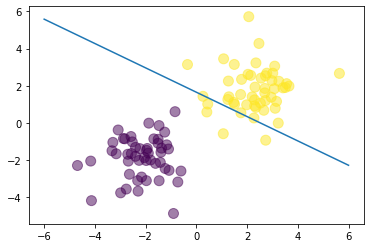

In [40]:
# plot the data and separating line
plt.scatter(X[:,0], X[:,1], c=T, s=100, alpha=0.5)
x_axis = np.linspace(-6, 6, 100)
y_axis = -(w[0] + x_axis*w[1]) / w[2]
plt.plot(x_axis, y_axis)

In [42]:
# try it with our closed-form solution
w = np.array([0, 4, 4])

# calculate the model output
z = Xb.dot(w)
Y = sigmoid(z)

# calculate the cross-entropy error
print(cross_entropy(T, Y))

0.49608844546611214


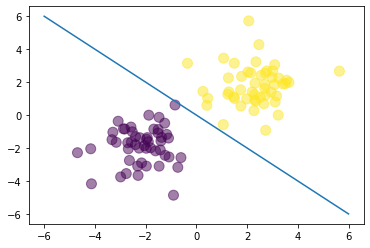

In [43]:
# Visualizing linear discriminant


# plot the data and separating line
plt.scatter(X[:,0], X[:,1], c=T, s=100, alpha=0.5)
x_axis = np.linspace(-6, 6, 100)
y_axis = -(w[0] + x_axis*w[1]) / w[2]
plt.plot(x_axis, y_axis)